In [1]:
#importing necessary libraries for descriptive analytics 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Read The Dataset <--- Red Wine Quality

df = pd.read_csv('datasets_4458_8204_winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.shape

(1599, 12)

In [6]:
#dataset summary
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
#data structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
###Try to Classify The Quality

quality = df["quality"].values
category = []

for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")
        
#Create new data
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)


### on the basis of above observation we can canclude that :
#### a) All Variables are numeric and computable. 
#### b) dataset has no null value.
#### -> hence no need to clean data for null values.
#### 1) fixed acidity, residual sugar, chlorides, free sulfur dioxide,total sulfur dioxide --->  max (have high value) have more dispersion from 3rd Quartil than difference between 1st Q and min and 2nd Q & 3rd Q
#### -> hence Outlier may be possible 

#### 2) volatile acidity, citric acid, sulphates	 <-- right skewed 

#### 3) density <-- noramal distributed








array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000288A1850E08>,
      dtype=object)

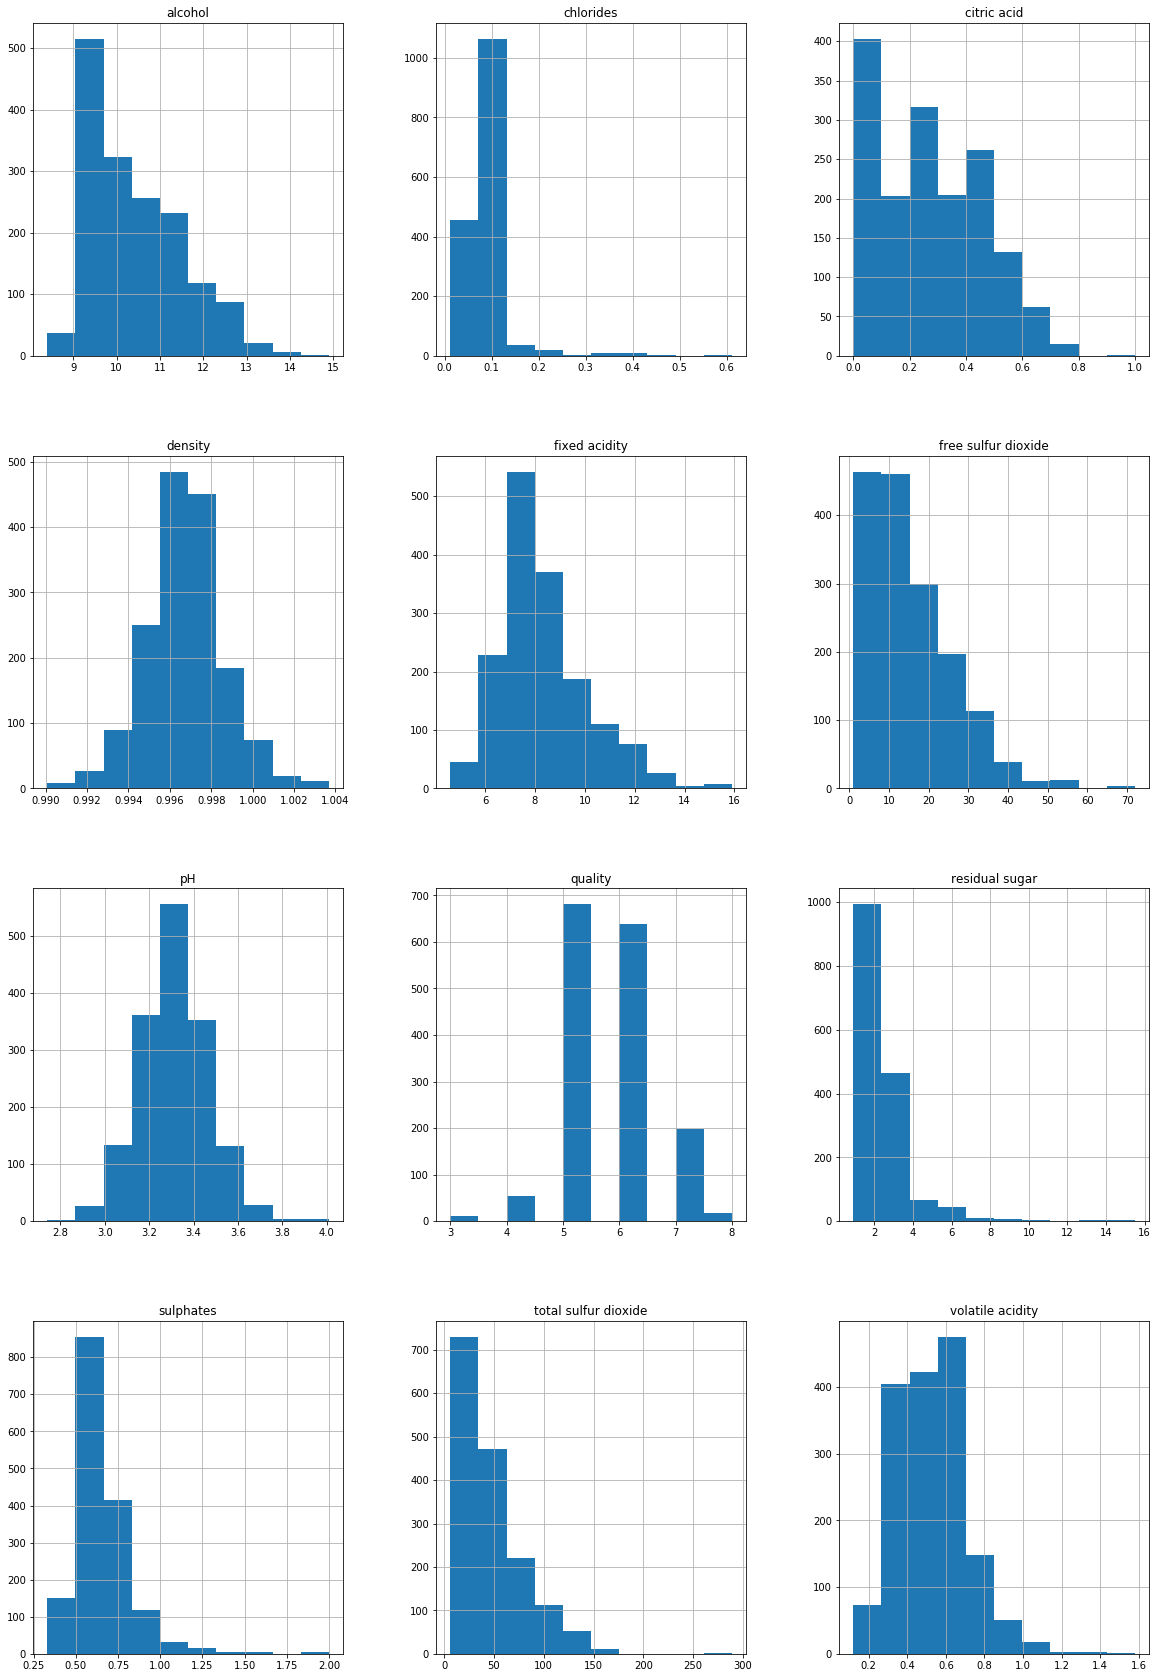

In [9]:
#statistical plots 
#Univariate Analysis:Histograms
df.hist(figsize=(20,30))

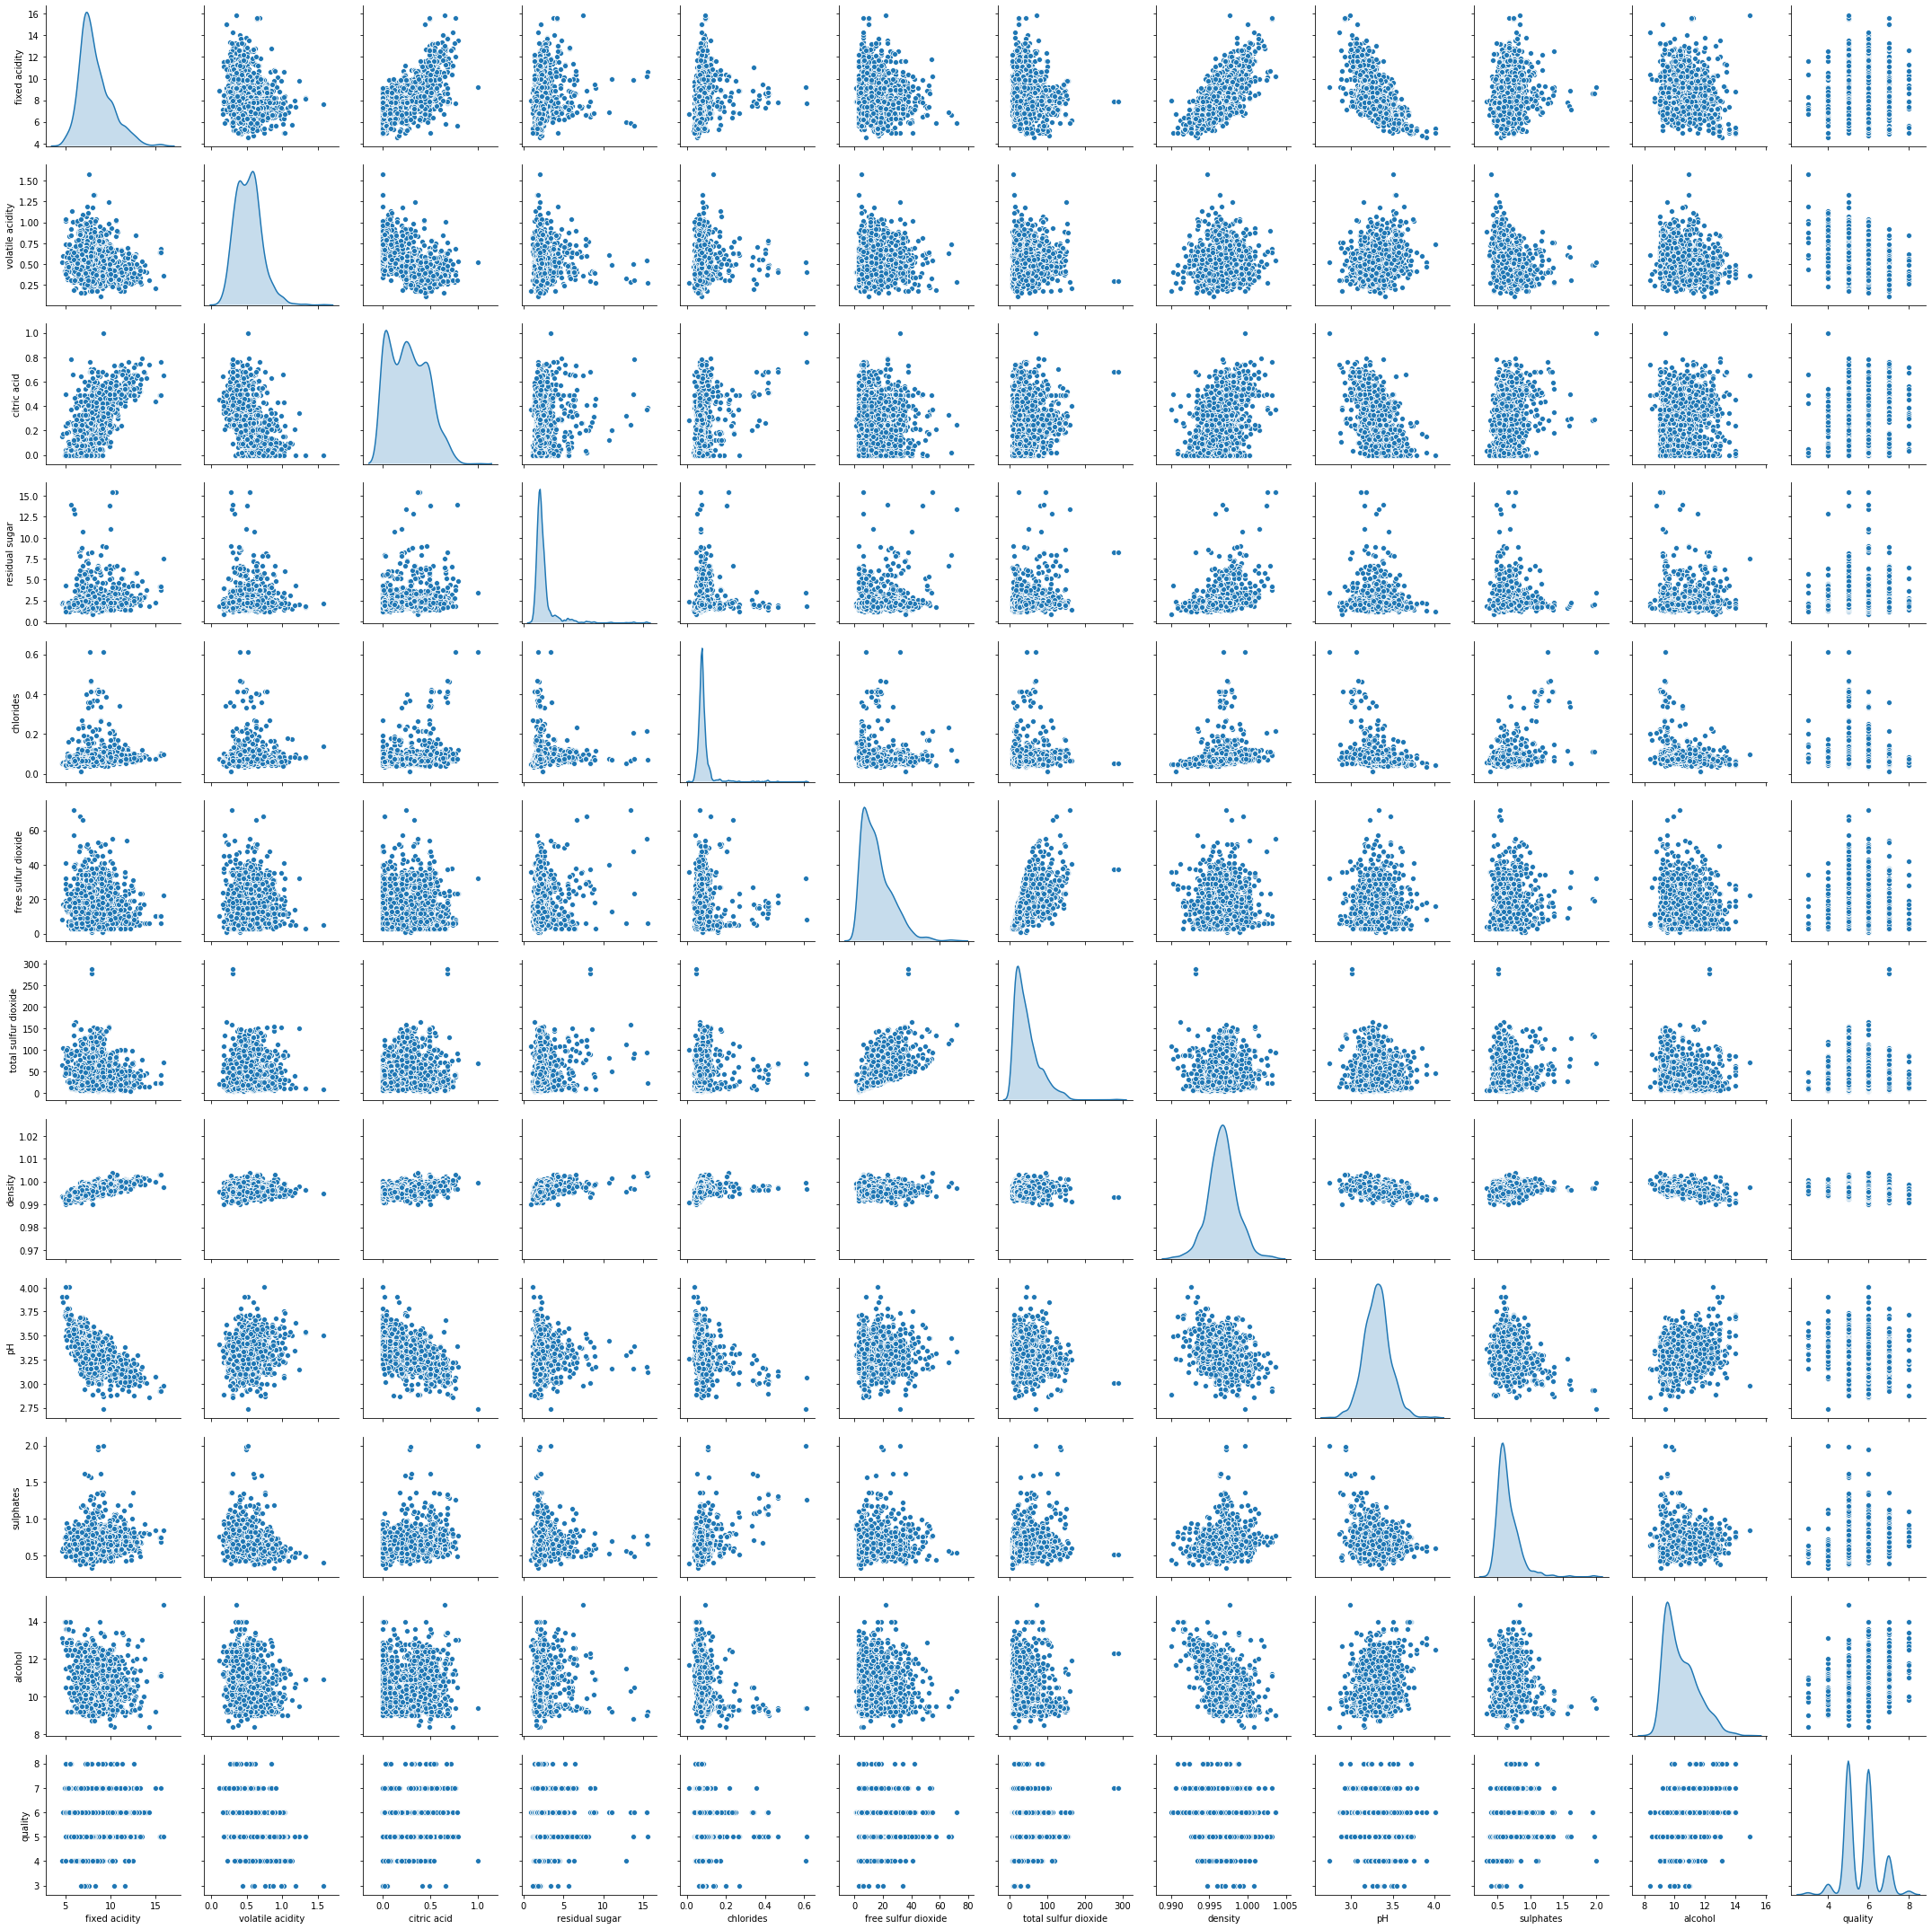

In [10]:
#statistical plots
#looking at the whole dataset graphical plots at once using pairplot 

sns.pairplot(df,diag_kind = 'kde')

# from above observation we can say..
###### 1. sulphates, pH, Density are normally distributed &
###### 2. ---> Fixed acidity : have relation with citric acid and strong relation with density and pH,
###### ---> Volatile acidity have relation with citric acid &
###### ---> residual sugar have relation with density ..etc

#### So before knowing all the correlation between varaibles let's find the outliers using boxplot


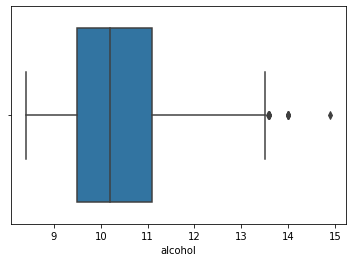

In [11]:
sns.boxplot(df['alcohol'])

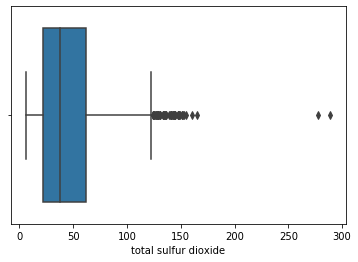

In [12]:
sns.boxplot(df['total sulfur dioxide'])

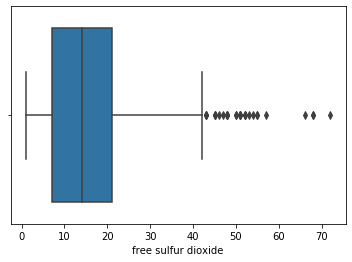

In [13]:
sns.boxplot(df['free sulfur dioxide'])

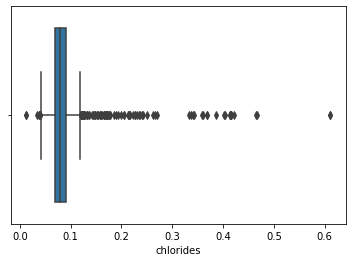

In [14]:
sns.boxplot(df['chlorides'])

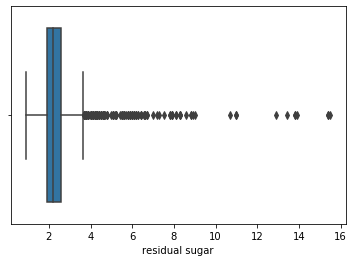

In [15]:
sns.boxplot(df['residual sugar'])

#### statistical plots 
### Bivariate analysis

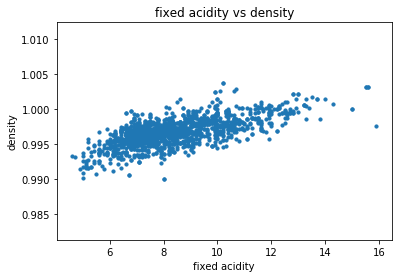

In [16]:
plt.scatter(df["fixed acidity"],df["density"],s=10,marker='o')
plt.title("fixed acidity vs density")
plt.xlabel("fixed acidity")
plt.ylabel("density")
plt.show()

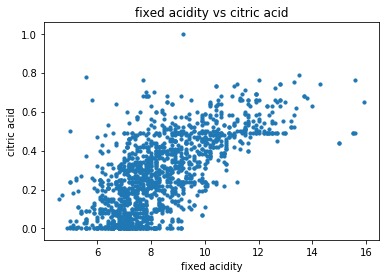

In [17]:
plt.scatter(df["fixed acidity"],df["citric acid"],s=10,marker='o')
plt.title("fixed acidity vs citric acid")
plt.xlabel("fixed acidity")
plt.ylabel("citric acid")
plt.show()

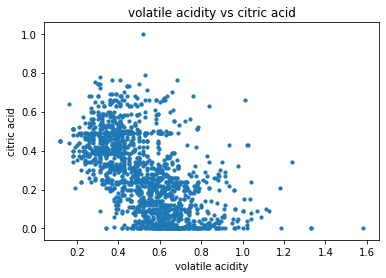

In [18]:
plt.scatter(df["volatile acidity"],df["citric acid"],s=10,marker='o')
plt.title("volatile acidity vs citric acid")
plt.xlabel("volatile acidity")
plt.ylabel("citric acid")
plt.show()

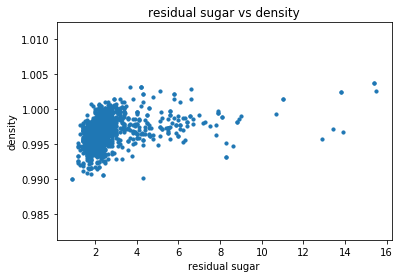

In [19]:
plt.scatter(df["residual sugar"],df["density"],s=10,marker='o')
plt.title("residual sugar vs density")
plt.xlabel("residual sugar")
plt.ylabel("density")
plt.show()

In [20]:
#Correlation
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

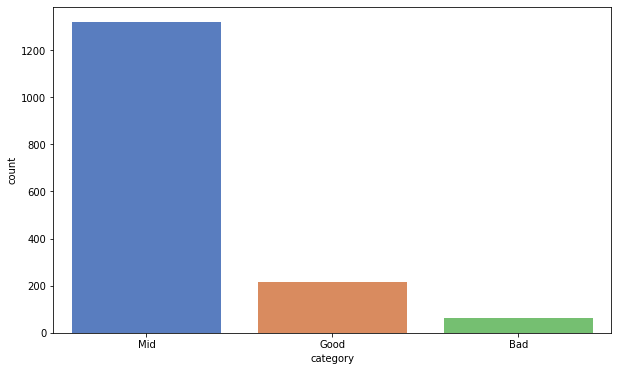

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()

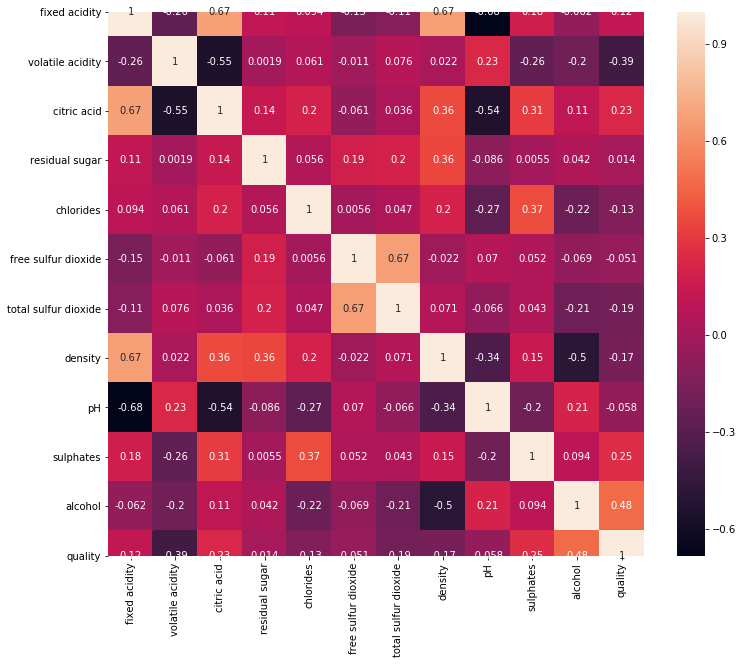

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)

### According to heatmap, we can focus on alcohol-quality and density-alcohol relations to get meaningful exploration

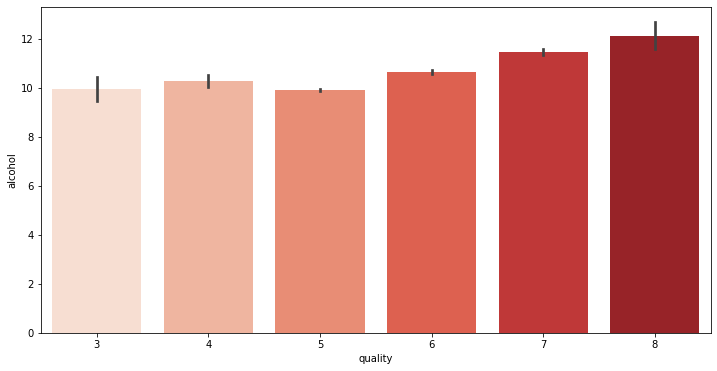

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["quality"],y=df["alcohol"],palette="Reds")

<Figure size 864x432 with 0 Axes>

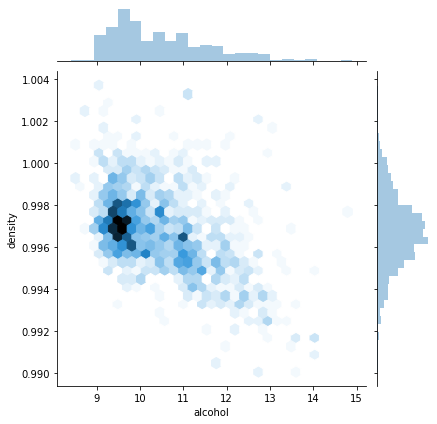

In [24]:
plt.figure(figsize=(12,6))
sns.jointplot(y=df["density"],x=df["alcohol"],kind="hex")

# K Nearest Neighbours

In [25]:
#importing necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [26]:
#Setting features, labels and Encoding the categorical data
#(good=1, med=2, bad=3)

X= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)


#### Scaling the data for optimise predictions

In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [28]:
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [29]:
# Generate the confusion matrix and classification report
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[  0   0  13]
 [  0  17  13]
 [  0  14 263]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.55      0.57      0.56        30
           2       0.91      0.95      0.93       277

    accuracy                           0.88       320
   macro avg       0.49      0.51      0.50       320
weighted avg       0.84      0.88      0.86       320



C:\Users\Spike\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
metrics.accuracy_score(y_test,y_pred)

0.875